<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Посмотрите,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-Опишите-выводы." data-toc-modified-id="Посмотрите,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-Опишите-выводы.-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.</a></span></li><li><span><a href="#Сравните-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-Если-распределения-сильно-отличаются-друг-от-друга,-оценка-модели-будет-неправильной." data-toc-modified-id="Сравните-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-Если-распределения-сильно-отличаются-друг-от-друга,-оценка-модели-будет-неправильной.-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.</a></span></li><li><span><a href="#Исследуйте-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Исследуйте-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.metrics import mean_absolute_error, accuracy_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

In [2]:
train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv')
test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv')
full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv')

In [3]:
display('train')
display(train.head())
display('test')
display(test.head())
display('full')
display(full.head())

'train'

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


'test'

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


'full'

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
print('train')
train.info()
print('test')
test.info()
print('full')
full.info()

train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  fl

In [5]:
display('train')
display(train.describe())
display('test')
display(test.describe())
display('full')
display(full.describe())

'train'

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


'test'

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


'full'

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


In [6]:
print('Количество дубликатов train:', sum(train.duplicated()))
print('Количество дубликатов test:', sum(test.duplicated()))
print('Количество дубликатов full:', sum(full.duplicated()))

Количество дубликатов train: 0
Количество дубликатов test: 0
Количество дубликатов full: 0


Дубликатов нет

In [7]:
pd.set_option('display.max_rows', None)

In [8]:
train.isnull().sum()/len(train)

date                                                  0.000000
final.output.concentrate_ag                           0.000071
final.output.concentrate_pb                           0.000071
final.output.concentrate_sol                          0.014913
final.output.concentrate_au                           0.000000
final.output.recovery                                 0.000000
final.output.tail_ag                                  0.000000
final.output.tail_pb                                  0.007068
final.output.tail_sol                                 0.000353
final.output.tail_au                                  0.000000
primary_cleaner.input.sulfate                         0.001414
primary_cleaner.input.depressant                      0.002262
primary_cleaner.input.feed_size                       0.000000
primary_cleaner.input.xanthate                        0.007068
primary_cleaner.output.concentrate_ag                 0.000000
primary_cleaner.output.concentrate_pb                 0

In [9]:
test.isnull().sum()/len(train)

date                                          0.000000
primary_cleaner.input.sulfate                 0.000283
primary_cleaner.input.depressant              0.000353
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.000283
primary_cleaner.state.floatbank8_a_air        0.000000
primary_cleaner.state.floatbank8_a_level      0.000000
primary_cleaner.state.floatbank8_b_air        0.000000
primary_cleaner.state.floatbank8_b_level      0.000000
primary_cleaner.state.floatbank8_c_air        0.000000
primary_cleaner.state.floatbank8_c_level      0.000000
primary_cleaner.state.floatbank8_d_air        0.000000
primary_cleaner.state.floatbank8_d_level      0.000000
rougher.input.feed_ag                         0.000000
rougher.input.feed_pb                         0.000000
rougher.input.feed_rate                       0.000212
rougher.input.feed_size                       0.000071
rougher.input.feed_sol                        0.001484
rougher.in

In [10]:
full.isnull().sum()/len(train)

date                                                  0.000000
final.output.concentrate_ag                           0.000071
final.output.concentrate_pb                           0.000071
final.output.concentrate_sol                          0.014913
final.output.concentrate_au                           0.000000
final.output.recovery                                 0.000000
final.output.tail_ag                                  0.000071
final.output.tail_pb                                  0.007138
final.output.tail_sol                                 0.000424
final.output.tail_au                                  0.000000
primary_cleaner.input.sulfate                         0.001696
primary_cleaner.input.depressant                      0.002615
primary_cleaner.input.feed_size                       0.000000
primary_cleaner.input.xanthate                        0.007350
primary_cleaner.output.concentrate_ag                 0.000000
primary_cleaner.output.concentrate_pb                 0

Присутствуют пропуски пока оставим как есть

In [11]:
recovery_target = train['rougher.output.recovery']
recovery_target

0         87.107763
1         86.843261
2         86.842308
3         87.226430
4         86.688794
5         88.156912
6         88.168065
7         87.668336
8         87.035862
9         87.650868
10        88.280699
11        88.499117
12        89.299981
13        89.519701
14        87.235441
15        85.136294
16        85.443505
17        86.489827
18        85.462226
19        86.241795
20        86.582578
21        86.824119
22        88.132239
23        85.910498
24        86.262377
25        87.561100
26        87.580848
27        87.107693
28        87.431708
29        86.798211
30        88.066903
31        88.804718
32        89.964407
33        86.303989
34        87.298278
35        85.448045
36        87.323840
37        88.151219
38        88.012961
39        85.633837
40        85.017832
41        87.941479
42        86.205601
43        82.078433
44        91.408585
45         0.000000
46         0.000000
47         0.000000
48         0.000000
49         0.000000


In [12]:
c = train['rougher.output.concentrate_au']
f = train['rougher.input.feed_au']
t = train['rougher.output.tail_au']
recovery_calc = c * (f - t) / (f * (c - t)) * 100
recovery_train = train['rougher.output.recovery']

In [13]:
#y = abs(recovery_train-recovery_calc)
#Y = 0.5 * (abs(recovery_train) + abs(recovery_calc))
#n = len(recovery_train)
#smape = 1 / n * (y / Y).sum() * 100
#print('sMAPE для "Эфективности обогощения золота на этапе флотации"')
#print('{0:.2E}'.format(smape))

In [14]:
recovery_train.min()

0.0

In [15]:
recovery_calc.min()

-0.0

In [16]:
recovery_train.max()

100.0

In [17]:
recovery_calc.max()

100.0

In [18]:
mean_absolute_error(recovery_calc, recovery_train)

9.73512347450521e-15

MAE 9.7 хороший результат, можно считать что значения посчитаны верно.

In [19]:
test_list = test.columns.tolist()
full_list = full.columns.tolist()

result = list(set(full_list) - set(test_list))
result = sorted(result)

print(len(result))
result

34


['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке отсутствуют 34 колонки:

    2 колонки - final.output.recovery и rougher.output.recovery - это таргеты 
    
    12 колонок - rougher/primary_cleaner/final.output.concentrate_хх - выходные концентрации веществ
    
    16 колонок rougher/primary_cleaner/secondary_cleaner/final.output.tail_хх - отвальные хвосты
    
    

#### Предобработка данных

In [20]:
print(train.shape)
print(test.shape)

(14149, 87)
(5290, 53)


В обучающей выборке больше признаков чем в тестовой, посмотрим что есть в обучающей чего нет в тестовой

In [21]:
missing_cols = train.columns.drop(test.columns)
train[missing_cols].head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.output.concentrate_ag,...,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,8.547551,...,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,14.500184,4.694824,8.764648,2.606185
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,8.558743,...,20.050975,86.843261,4.955378,0.536689,18.965234,1.184827,14.265474,4.592547,9.001494,2.488248
2,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,8.603505,...,19.737170,86.842308,4.843460,0.546416,18.808533,1.162562,14.115662,4.624775,8.842896,2.458187
3,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,7.221879,...,19.320810,87.226430,4.655288,0.542525,19.330200,1.079755,13.732071,4.482453,9.122857,2.322062
4,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,9.089428,...,19.216101,86.688794,4.552800,0.515438,19.267422,1.012642,14.079996,4.470737,8.871028,2.330448


Это различные выходные данные на разных этапах очистки, для анализа они нам не требуются.

Так же в тестовой выборке отсутствуют нужные нам данные это final.output.recovery и rougher.output.recovery

Соответственно убираем лишнее добавляем нужное

In [22]:
cols_to_drop = missing_cols.drop(['final.output.recovery', 'rougher.output.recovery'])
right_cols = train.columns.drop(cols_to_drop)
train = train[right_cols]

In [23]:
train.head()

,date,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,70.541216,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,69.266198,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,68.116445,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,68.347543,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,66.927016,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [24]:
target_features_to_join = full[['date', 'final.output.recovery', 'rougher.output.recovery']].copy()

In [25]:
test = test.join(target_features_to_join.set_index('date'), on='date')

In [26]:
train['final.output.recovery'].isnull().value_counts()

False    14149
Name: final.output.recovery, dtype: int64

In [27]:
test['final.output.recovery'].isnull().value_counts()

False    5290
Name: final.output.recovery, dtype: int64

Пропусков нет все необходимые данные есть, можно переходить к анализу

## Анализ данных

#### Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

In [28]:
au_data = (full[[
    'rougher.input.feed_au', 
    'rougher.output.concentrate_au', 
    'primary_cleaner.output.concentrate_au', 
    'final.output.concentrate_au']].copy())

In [29]:
ag_data = (full[[
    'rougher.input.feed_ag', 
    'rougher.output.concentrate_ag', 
    'primary_cleaner.output.concentrate_ag', 
    'final.output.concentrate_ag']].copy())

In [30]:
pb_data = (full[[
    'rougher.input.feed_pb', 
    'rougher.output.concentrate_pb', 
    'primary_cleaner.output.concentrate_pb', 
    'final.output.concentrate_pb']].copy())

In [31]:
def draw_hist (data, title):
    fig, ax = plt.subplots()
    ax.set_ylabel('Кол-во наблюдений')
    ax.set_xlabel('Концентрация металла')
    ax.set_title(title)
    for col in data:
        data[col].hist(alpha=.5) 
        ax.legend(['Исходное сырье','Флотация','Первичная очистка', 'Вторичная очистка'])

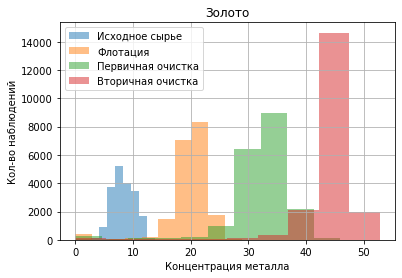

In [32]:
draw_hist(au_data, 'Золото')

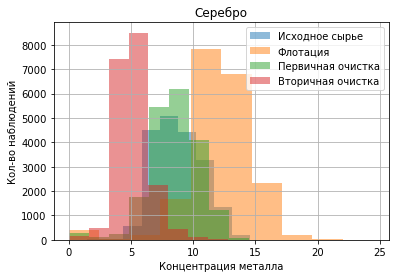

In [33]:
draw_hist(ag_data, 'Серебро')

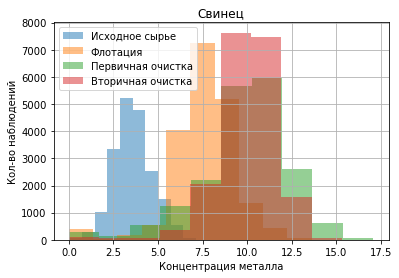

In [34]:
draw_hist(pb_data, 'Свинец')

Видно что с каждым этапом очистки концентрация золота повышается.

Концентрация серебра после вторичной очистки ниже чем после первичной.

Концентрация свинца остается на одном уровне после первичной и вторичной очистки.

#### Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

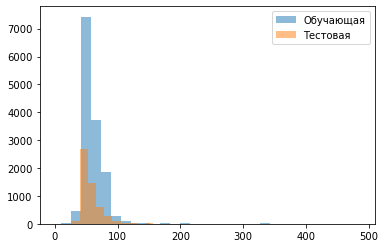

In [35]:
x = train['rougher.input.feed_size']
y = test['rougher.input.feed_size']

plt.hist(x, 30, alpha=0.5, label='Обучающая')
plt.hist(y, 30, alpha=0.5, label='Тестовая')
plt.legend(loc='upper right')
plt.show()

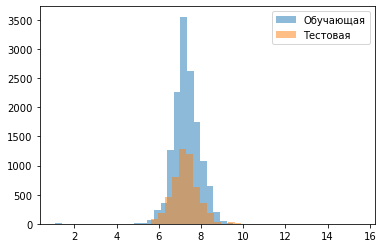

In [36]:
x = train['primary_cleaner.input.feed_size']
y = test['primary_cleaner.input.feed_size']

plt.hist(x, 30, alpha=0.5, label='Обучающая')
plt.hist(y, 30, alpha=0.5, label='Тестовая')
plt.legend(loc='upper right')
plt.show()

Распределение размера гранул сырья на обоих выборках примерно равно.

#### Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [37]:
train.columns

Index(['date', 'final.output.recovery', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.output.recovery',
       'rougher.state.floatbank10_

In [38]:
concentrate_data = full[['date','rougher.input.feed_ag', 'rougher.input.feed_pb','rougher.output.concentrate_pb', 
                         'rougher.output.concentrate_ag', 'rougher.output.concentrate_sol', 
                         'rougher.output.concentrate_au' ,'rougher.input.feed_sol',
                         'rougher.input.feed_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
                         'final.output.concentrate_sol', 'final.output.concentrate_au']].copy()
concentrate_data['conc_sum_rougher'] = concentrate_data['rougher.input.feed_ag'] + concentrate_data['rougher.input.feed_pb'] + \
                        concentrate_data['rougher.input.feed_sol'] + concentrate_data['rougher.input.feed_au']
concentrate_data['conc_sum_output'] = concentrate_data['rougher.output.concentrate_ag'] + \
                        concentrate_data['rougher.output.concentrate_pb'] + \
                        concentrate_data['rougher.output.concentrate_sol'] + \
                        concentrate_data['rougher.output.concentrate_au']
concentrate_data['conc_sum_final'] = concentrate_data['final.output.concentrate_ag'] + \
                        concentrate_data['final.output.concentrate_pb'] +\
                        concentrate_data['final.output.concentrate_sol'] + \
                        concentrate_data['final.output.concentrate_au']

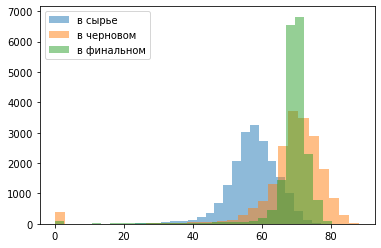

In [39]:
x = concentrate_data['conc_sum_rougher']
y = concentrate_data['conc_sum_output']
z = concentrate_data['conc_sum_final']

plt.hist(x, 30, alpha=0.5, label='в сырье')
plt.hist(y, 30, alpha=0.5, label='в черновом')
plt.hist(z, 30, alpha=0.5, label='в финальном')
plt.legend(loc='upper left')
plt.show()

Присутствует небольшое количество нулевых значений, воможно поподались гранулы без металлов.

Так же видно что концентрации металлов с этапами повышается, но в финальном результате немного снижается при этом становится стабильнее показатели концентрации.

In [40]:
concentrate_data = concentrate_data[(concentrate_data['conc_sum_rougher'] != 0) &
         (concentrate_data['conc_sum_output'] != 0) & 
         (concentrate_data['conc_sum_final'] != 0)]

In [41]:
concentrate_data.head()

,date,rougher.input.feed_ag,rougher.input.feed_pb,rougher.output.concentrate_pb,rougher.output.concentrate_ag,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.input.feed_sol,rougher.input.feed_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,conc_sum_rougher,conc_sum_output,conc_sum_final
0,2016-01-15 00:00:00,6.100378,2.284912,7.101074,11.500771,28.029297,19.793808,36.808594,6.486150,6.055403,9.889648,5.507324,42.192020,51.680034,66.424950,63.644396
1,2016-01-15 01:00:00,6.161113,2.266033,7.278807,11.615865,28.067063,20.050975,35.753385,6.478583,6.029369,9.968944,5.257781,42.701629,50.659114,67.012710,63.957723
2,2016-01-15 02:00:00,6.116455,2.159622,7.216833,11.695753,27.454037,19.737170,35.971630,6.362222,6.055926,10.213995,5.383759,42.657501,50.609929,66.103793,64.311180
3,2016-01-15 03:00:00,6.043309,2.037807,7.175616,11.915047,27.341277,19.320810,36.862241,6.118189,6.047977,9.977019,4.858634,42.689819,51.061546,65.752751,63.573449
4,2016-01-15 04:00:00,6.060915,1.786875,7.240205,12.411054,27.041023,19.216101,34.347666,5.663707,6.148599,10.142511,4.939416,42.774141,47.859163,65.908382,64.004667


In [42]:
display(test.isna().sum()/len(test))
display(train.isna().sum()/len(train))

date                                          0.000000
primary_cleaner.input.sulfate                 0.000756
primary_cleaner.input.depressant              0.000945
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.000756
primary_cleaner.state.floatbank8_a_air        0.000000
primary_cleaner.state.floatbank8_a_level      0.000000
primary_cleaner.state.floatbank8_b_air        0.000000
primary_cleaner.state.floatbank8_b_level      0.000000
primary_cleaner.state.floatbank8_c_air        0.000000
primary_cleaner.state.floatbank8_c_level      0.000000
primary_cleaner.state.floatbank8_d_air        0.000000
primary_cleaner.state.floatbank8_d_level      0.000000
rougher.input.feed_ag                         0.000000
rougher.input.feed_pb                         0.000000
rougher.input.feed_rate                       0.000567
rougher.input.feed_size                       0.000189
rougher.input.feed_sol                        0.003970
rougher.in

date                                          0.000000
final.output.recovery                         0.000000
primary_cleaner.input.sulfate                 0.001414
primary_cleaner.input.depressant              0.002262
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.007068
primary_cleaner.state.floatbank8_a_air        0.000283
primary_cleaner.state.floatbank8_a_level      0.000071
primary_cleaner.state.floatbank8_b_air        0.000283
primary_cleaner.state.floatbank8_b_level      0.000071
primary_cleaner.state.floatbank8_c_air        0.000141
primary_cleaner.state.floatbank8_c_level      0.000071
primary_cleaner.state.floatbank8_d_air        0.000212
primary_cleaner.state.floatbank8_d_level      0.000071
rougher.input.feed_ag                         0.000000
rougher.input.feed_pb                         0.007068
rougher.input.feed_rate                       0.000565
rougher.input.feed_size                       0.010177
rougher.in

In [43]:
test.dropna(inplace=True)
train.dropna(inplace=True)

## Модель

In [44]:
def smape (target, predictions):
    return 100/len(target) * np.sum(2 * np.abs(predictions - target) / (np.abs(target) + np.abs(predictions)))

In [45]:
def final_smape (rougher, final):
    return 0.25 * rougher + 0.75 * final

In [46]:
smape_score = make_scorer(smape)

In [47]:
target_rougher = train['rougher.output.recovery']
target_final = train['final.output.recovery']

features_train = train.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis='columns')

In [48]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)

In [49]:
model_dtr_r = DecisionTreeRegressor(random_state=12345)
smape_dtr_r = cross_val_score(model_dtr_r, features_train, target_rougher, 
                             scoring = smape_score).mean()

In [50]:
model_dtr_f = DecisionTreeRegressor(random_state=12345)
smape_dtr_f = cross_val_score(model_dtr_f, features_train, target_final, 
                             scoring = smape_score).mean()

In [51]:
print('Дерево решений:')
print('sMAPE rougher: {:.2f} %'.format(smape_dtr_r))
print('sMAPE final: {:.2f} %'.format(smape_dtr_f))
print('Final sMAPE: {:.2f} %'.format(final_smape(smape_dtr_r, smape_dtr_f)))

Дерево решений:
sMAPE rougher: 20.62 %
sMAPE final: 23.15 %
Final sMAPE: 22.52 %


In [52]:
model_lr_r = LinearRegression()
smape_lm_r = cross_val_score(model_lr_r, features_train, target_rougher, 
                             scoring = smape_score).mean()

In [53]:
model_lr_f = LinearRegression()
smape_lm_f = cross_val_score(model_lr_f, features_train, target_final, 
                             scoring = smape_score).mean()

In [54]:
print('Линейная регрессия:')
print('sMAPE rougher: {:.2f} %'.format(smape_lm_r))
print('sMAPE final: {:.2f} %'.format(smape_lm_f))
print('Final sMAPE: {:.2f} %'.format(final_smape(smape_lm_r, smape_lm_f)))

Линейная регрессия:
sMAPE rougher: 10.85 %
sMAPE final: 10.96 %
Final sMAPE: 10.93 %


In [55]:
model_rf_r = RandomForestRegressor(random_state=12345, n_estimators=10)
smape_rf_r = cross_val_score(model_rf_r, features_train, target_rougher, 
                             scoring = make_scorer(smape)).mean()

In [56]:
model_rf_f = RandomForestRegressor(random_state=12345, n_estimators=10)
smape_rf_f = cross_val_score(model_rf_f, features_train, target_final, 
                             scoring = make_scorer(smape)).mean()

In [57]:
print('Случайный лес:')
print('sMAPE rougher: {:.2f} %'.format(smape_rf_r))
print('sMAPE final: {:.2f} %'.format(smape_rf_f))
print('Final sMAPE: {:.2f} %'.format(final_smape(smape_rf_r, smape_rf_f)))

Случайный лес:
sMAPE rougher: 13.99 %
sMAPE final: 11.19 %
Final sMAPE: 11.89 %


In [58]:
start_time = time.time()
param_rf_grid = {
        'max_depth' : range(2,6)}
grid_random_forest_regr_rougher = GridSearchCV(RandomForestRegressor(random_state=12345), 
                                               param_grid = param_rf_grid, 
                                               cv=5, 
                                               n_jobs=-1, 
                                               scoring=make_scorer(smape,greater_is_better=False)) 
grid_random_forest_regr_rougher.fit(features_train, target_rougher)
params_rf_rougher = grid_random_forest_regr_rougher.best_params_
random_forest_regr_rougher = RandomForestRegressor(**params_rf_rougher, random_state = 12345)
random_forest_regr_rougher.fit(features_train, target_rougher)
print('Best params for model: ', grid_random_forest_regr_rougher.best_params_)

print(" %s seconds " % (time.time() - start_time))

Best params for model:  {'max_depth': 5}
 69.63331627845764 seconds 


In [59]:
start_time = time.time()

grid_random_forest_regr_final = GridSearchCV(RandomForestRegressor(random_state=12345), 
                                             param_grid = param_rf_grid, 
                                             cv=5, 
                                             n_jobs=-1, 
                                             scoring=make_scorer(smape,greater_is_better=False)) 
grid_random_forest_regr_final.fit(features_train, target_final)
params_rf_final = grid_random_forest_regr_final.best_params_
random_forest_regr_final = RandomForestRegressor(**params_rf_final, random_state = 12345)
random_forest_regr_final.fit(features_train, target_final)
print('Best params for model: ', grid_random_forest_regr_final.best_params_)

print(" %s seconds " % (time.time() - start_time))

Best params for model:  {'max_depth': 5}
 63.139260053634644 seconds 


In [60]:
smape_rf_r = cross_val_score(random_forest_regr_rougher, features_train, target_rougher, 
                             scoring = make_scorer(smape)).mean()

In [61]:
smape_rf_f = cross_val_score(random_forest_regr_final, features_train, target_final, 
                             scoring = make_scorer(smape)).mean()

In [62]:
print('sMAPE rougher: {:.2f} %'.format(smape_rf_r))
print('sMAPE final: {:.2f} %'.format(smape_rf_f))
print('Final sMAPE: {:.2f} %'.format(final_smape(smape_rf_r, smape_rf_f)))

sMAPE rougher: 10.26 %
sMAPE final: 9.34 %
Final sMAPE: 9.57 %


Лучший результат показывает модель RandomForestRegressor при max_depth = 5

In [63]:
test.shape, train.shape

((5229, 55), (12679, 55))

In [64]:
target_rougher_test = test['rougher.output.recovery']
target_final_test = test['final.output.recovery']

features_test = test.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis='columns')

In [65]:
#scaler = StandardScaler()
#scaler.fit(features_test)
features_test = scaler.transform(features_test)

In [66]:
model_lr = LinearRegression()
model_lr1 = LinearRegression()

lr_rougher = model_lr.fit(features_train, target_rougher)
lr_final = model_lr1.fit(features_train, target_final)

lr_predictions_rougher = lr_rougher.predict(features_test)
lr_predictions_final = lr_final.predict(features_test)

In [67]:
smape_rougher = smape(target_rougher_test, lr_predictions_rougher)

In [68]:
smape_final = smape(target_final_test, lr_predictions_final)

In [69]:
final_smape(smape_rougher, smape_final)

9.210107929028638

In [70]:
model_rf = RandomForestRegressor(max_depth=5)
model_rf1 = RandomForestRegressor(max_depth=5)

rf_rougher = model_rf.fit(features_train, target_rougher)
rf_final = model_rf1.fit(features_train, target_final)

rf_predictions_rougher = rf_rougher.predict(features_test)
rf_predictions_final = rf_final.predict(features_test)

In [71]:
smape_rougher = smape(target_rougher_test, rf_predictions_rougher)

In [72]:
smape_final = smape(target_final_test, rf_predictions_final)

In [73]:
final_smape(smape_rougher, smape_final)

9.49143149399642

Проверим адекватность модели с помощью DummyRegressor

In [74]:
dummy = DummyRegressor(strategy = 'mean')
dummy_1 = DummyRegressor(strategy = 'mean')

dummy_rougher = dummy.fit(features_train, target_rougher)
dummy_predictions_rougher = dummy_rougher.predict(features_test)

dummy_final = dummy_1.fit(features_train, target_final)
dummy_predictions_final = dummy_final.predict(features_test)

In [75]:
smape_rougher_dummy = smape(target_rougher_test, dummy_predictions_rougher)

In [76]:
smape_final_dummy = smape(target_final_test, dummy_predictions_final)

In [77]:
final_smape(smape_rougher_dummy, smape_final_dummy)

9.744788079141177

Модель LinearRegression предсказывает результат точнее DummyRegressor, вывод модель адекватна.

#### Вывод:

Данные успешно проанализированы. Показатель эффективности обогащения рассчитан корректно.

Проанализированы концентрации металлов (Au, Ag, Pb), а также суммарные концентрации веществ на разных стадиях очистки.

Данные обучены на моделях DecisionTreeRegressor, LinearRegression и RandomForestRegressor.

Применены техники кросс-валидации для оценки качества моделей.

Произведена проверка модели на адекватность.